In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [29]:
raw_data = pd.read_csv("real_estate_sales.csv")

# Fix columns
new_cols = {}
for col in raw_data.columns:
    new_cols[col] = col.lower().replace(" ", "_")
raw_data = raw_data.rename(columns=new_cols)

# Dates
raw_data['date_recorded'] = pd.to_datetime(raw_data['date_recorded'])
raw_data['month'] = raw_data['date_recorded'].dt.month

# Drop rows that are poorly represented
raw_data['year_count'] = raw_data.groupby('list_year')['list_year'].transform('count')
raw_data = raw_data[raw_data['year_count'] > 1]
raw_data = raw_data.drop(columns=['year_count'])

# Address
raw_data['town'] = raw_data['town'].apply(lambda x: 'EMPTY' if "unknown" in x else x)

raw_data['address'] = raw_data.apply(
    lambda row: row['address'] + ', ' + row['town'] 
    if "unknown" not in row['town']
    else row['address'], axis=1
)

raw_data.head()

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,years_until_sold,month
0,2020348,2020,2021-09-13,Ansonia,"230 WAKELEE AVE, Ansonia",150500,325000.0,0.4630,Commercial,Nan,1,9
1,20002,2020,2020-10-02,Ashford,"390 TURNPIKE RD, Ashford",253000,430000.0,0.5883,Residential,Single Family,0,10
2,200212,2020,2021-03-09,Avon,"5 CHESTNUT DRIVE, Avon",130400,179900.0,0.7248,Residential,Condo,1,3
3,200243,2020,2021-04-13,Avon,"111 NORTHINGTON DRIVE, Avon",619290,890000.0,0.6958,Residential,Single Family,1,4
4,200377,2020,2021-07-02,Avon,"70 FAR HILLS DRIVE, Avon",862330,1447500.0,0.5957,Residential,Single Family,1,7


In [16]:
test = raw_data['address'].unique()
print(len(test))

714372


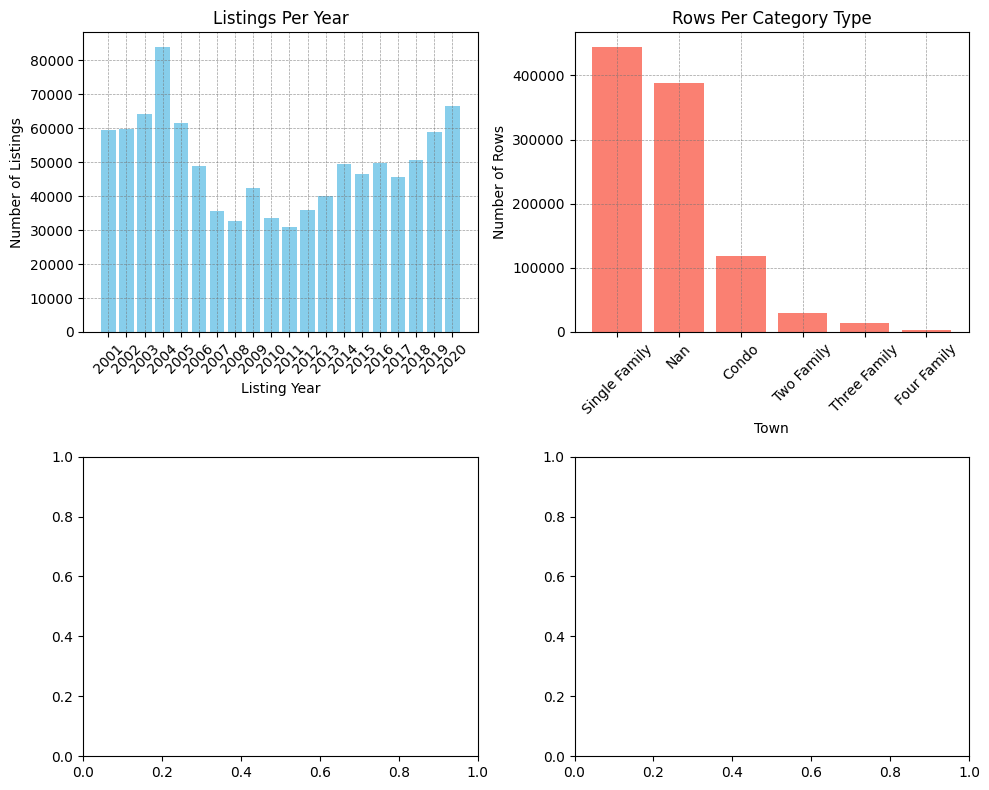

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the bar chart in the left top corner
yearly_counts = raw_data['list_year'].value_counts().sort_index()
axs[0, 0].bar(yearly_counts.index, yearly_counts.values, color='skyblue')
axs[0, 0].set_xlabel('Listing Year')
axs[0, 0].set_ylabel('Number of Listings')
axs[0, 0].set_title('Listings Per Year')

# Adding xticks with vertical rotation
axs[0, 0].set_xticks(yearly_counts.index)
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='#737373')

town_counts = raw_data['residential_type'].value_counts()
axs[0, 1].bar(town_counts.index, town_counts.values, color='salmon')
axs[0, 1].set_xlabel('Town')
axs[0, 1].set_ylabel('Number of Rows')
axs[0, 1].set_title('Rows Per Category Type')

# Adding xticks with vertical rotation for the town bar chart
axs[0, 1].tick_params(axis='x', rotation=45)

# Enable grid lines for the third subplot
axs[0, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='#737373')

# Adjust layout
plt.tight_layout()